In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

## Q.1 チャネル入れ替え
画像を読み込み、RGBをBGRの順に入れ替えよ
### 解法
各ピクセルを逆にすればいいだけなので[..., ::-1]で終わり

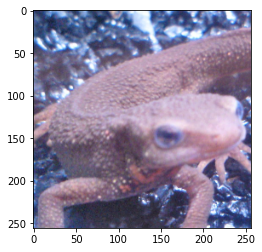

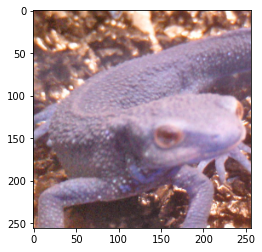

<Figure size 432x288 with 0 Axes>

In [2]:
def rgb2gbr(img):
    """rgb --> gbr"""
    return img[..., ::-1]
def q1():
    # rgbの順で画像を読み込む
    img = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_changed = rgb2gbr(img)
    plt.imshow(img)
    plt.show()
    plt.imshow(img_changed)
    plt.show()
    plt.clf()
q1()

## Q.2 グレースケール Grayscale
画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Grayscale = 0.2126 R + 0.7152 G + 0.0722 B

それぞれの係数は人間の視覚の敏感さであり、Gに人間の最も強く反応し、Bにはあまり反応しないことを示す。

## 解法
やるだけ
実際はcv2に関数があるのでそれを使うことが多いと思う

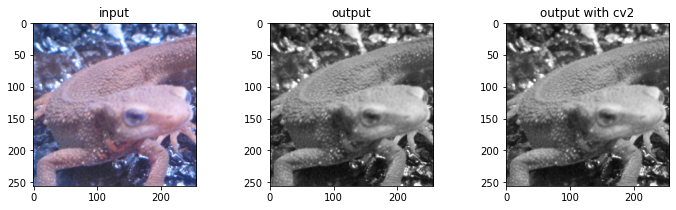

In [3]:
def rgb2gray(img):
    """画像をgray scaleに変換 uint8で返す"""
    gray_img = np.clip(img[:, :, 0] * 0.2126 + img[:, :, 1] * 0.7152 + img[:, :, 2] * 0.0722, 0, 255)

    return gray_img.astype(np.uint8)

def q2():
    img = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    gray_img = rgb2gray(img)
    gray_img_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # subplotで1行2列のプロット作成
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.title("input")
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.title("output")
    plt.imshow(gray_img, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("output with cv2")
    plt.imshow(gray_img_cv2, cmap="gray")
    plt.show()
q2()

## Q.3 二値化, Binarization
画像を二値化せよ。 二値化とは、画像を特定の値を閾値として黒と白の二値で表現する方法である。 ここでは、

グレースケール化
閾値を128にして二値化する。
$$ y = \begin{cases} 0 & (if , x < th) \\ 255 & (otherwise) \end{cases} $$

```python
# opencv
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()
```

## 解法
やるだけ
知ってるのがnp.whereだったからそれを使ったけど解説の実装かしこい〜〜〜

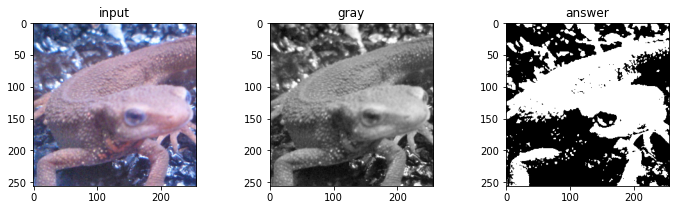

In [4]:
def binary(img, th):
    """th未満を0,以上を255に変換"""
    bin_img = np.where(img < th, 0, 255)
    return bin_img
# answer
def binary_ans(img, th):
    _img = img.copy()
    _img = np.minimum(_img // th, 1) * 255
    return _img.astype(np.uint8)

def q3():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_gray = rgb2gray(img_orig)
    img_bin = binary(img_gray, 127)

    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 3, 2)
    plt.title('gray')
    plt.imshow(img_gray, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('answer')
    plt.imshow(img_bin, cmap='gray')
    plt.show()
q3()

## Q.4 大津の二値化, Otsu's binarization
大津の二値化を実装せよ。 ここでは、

1. グレースケール化
2. 大津の二値化
大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する教師なし手法である。 これはクラス内分散とクラス間分散の比から計算される。

以下原理の説明。

まず、グレースケールの輝度値（ピクセルの値）のヒストグラムはこうなる。ここで赤線を閾値として、左側をクラス0、右側をクラス1として、この二つのクラスがバランスよく分離できれば良い二値化といえる。よって、クラス0と1の分離度を定義する。

## 解法
公式の解説に則って実装する。取りうる値が$2^8$なのでforで回せる。もう少し賢いやり方ありそうだけどわからん。
ndarray.sizeで要素数取得できるの知らなかった。torchとかもこれ使えそう

/tmp/ipykernel_8660/1057867857.py:7: RuntimeWarning: Mean of empty slice.
  m_0 = img[img < th].mean()  # class 0 mean
/home/yosaka/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


max threshold: 128


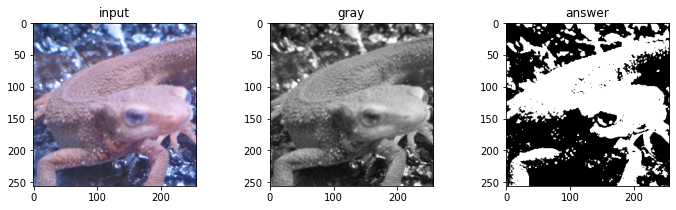

In [5]:
def otu_binary(img):
    max_var = -1
    max_th = 0
    for th in range(1, 255):
        w_0 = img[img < th].size  # class 0 size
        w_1 = img[img >= th].size  # class 1 size
        m_0 = img[img < th].mean()  # class 0 mean
        m_1 = img[img >= th].mean()  # class 1 mean
        var = (w_0 * w_1) / ((w_0 + w_1) ** 2) * ((m_0 - m_1) ** 2)
        if var > max_var:
            max_var = var
            max_th = th
    img_bin = binary(img, max_th)
    return max_th, img_bin

def q4():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_gray = rgb2gray(img_orig)
    th, img_bin = otu_binary(img_gray)
    print(f"max threshold: {th}")
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 3, 2)
    plt.title('gray')
    plt.imshow(img_gray, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('answer')
    plt.imshow(img_bin, cmap='gray')
    plt.show()

q4()    

## Q.5 HSV変換, HSV transformation
HSV変換を実装して、色相Hを反転（Hを180度反転）せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

- Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0 <= S < 1)
- Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
- Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 1) 色相は次の色に対応する

ここでHueをとるのとRGBをとるのは何が違うかというと、色成分をとる時に違う、RGBでは $1678万 = 256^3$次元をとるため、緑を取りたいと思っても、範囲指定が複雑になる（G > 200 としてもRやBが200以上なら見た目が緑とは限らないから）。　逆にHueでは360次元で値をとるため、緑の指定が簡単になる。これを上手く活用できれば色成分の抽出が簡単に行えることもある。

$$ (R, G, B) = (V - S) + \begin{cases} (S, X, 0) & ({\rm if} , 0 \leq H' < 1) \\ (X, C, 0) & ({\rm if} , 1 \leq H' < 2) \\ (0, C, X) & ({\rm if} , 2 \leq H' < 3) \\ (0, X, C) & ({\rm if} , 3 \leq H' < 4) \\ (X, 0, C) & ({\rm if} , 4 \leq H' < 5) \\ (C, 0, X) & ({\rm if} , 5 \leq H' < 6) \\ \end{cases} $$

## 解法
cv2のHueは180度であることに注意。バグりすぎて公式解法見ながら直してしまった。


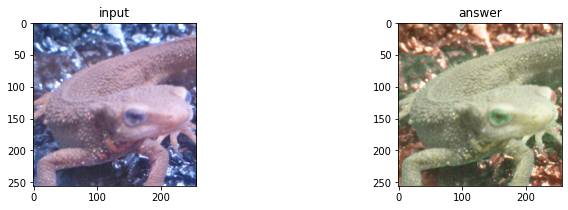

<Figure size 432x288 with 0 Axes>

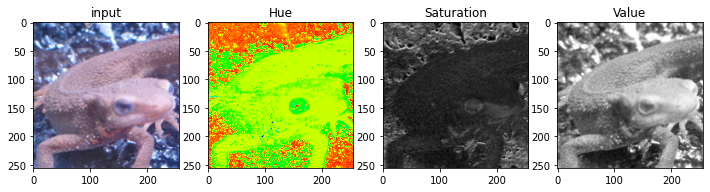

In [6]:
def rgb2hsv(rgb_img):
    """画像の定義に従って変換する"""
    _rgb_img = rgb_img.copy().astype(np.float32)
    vmax = np.max(_rgb_img, axis=2)
    vmin = np.min(_rgb_img, axis=2)
    v_argmin = np.argmin(_rgb_img, axis=2)
    hsv_img = np.zeros_like(_rgb_img, dtype=np.float32)
    v_diff = np.maximum(vmax - vmin, 1e-10)
    # H
    # B == vmin
    ind = v_argmin == 2
    hsv_img[:, :, 0][ind] = 60 * (_rgb_img[:,:, 1][ind] - _rgb_img[:, :, 0][ind]) / v_diff[ind] + 60
    # R == vmin
    ind = v_argmin == 0
    hsv_img[:, :, 0][ind] = 60 * (_rgb_img[:,:, 1][ind] - _rgb_img[:, :, 0][ind]) / v_diff[ind] + 180
    # G == vmin
    ind = v_argmin == 1
    hsv_img[:, :, 0][ind] = 60 * (_rgb_img[:,:, 1][ind] - _rgb_img[:, :, 0][ind]) / v_diff[ind] + 300
    # vmin == vmax
    ind = vmin == vmax
    hsv_img[:, :, 0][ind] = 0
    # S
    hsv_img[:, :, 1] = vmax - vmin
    hsv_img[:, :, 2] = vmax
    return hsv_img
    
def hsv2img(hsv_img):
    H, S, V = np.split(hsv_img, 3, axis=2)
    H, S, V = H[:,:, 0], S[:,:, 0], V[:,:, 0]
    Hd = H / 60
    X = S * (1 - np.abs(Hd % 2 - 1))
    rgb_img = np.zeros_like(hsv_img)
    Z = np.zeros_like(X)
    converter = np.array([
        [S, X, Z],
        [X, S, Z],
        [Z, S, X],
        [Z, X, S],
        [X, Z, S],
        [S, Z, X]]
    )
    for i in range(6):
        ind = Hd.astype(int) == i
        for j in range(3):
            rgb_img[:, :, j][ind] = (V - S)[ind] + converter[i, j][ind]
    return np.clip(rgb_img, 0, 255).astype(np.uint8)
        

def q5():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    
    hsv = rgb2hsv(img_orig)
    hsv[:, :, 0] = (hsv[:, :, 0] + 180) % 360 # Hue of opencv is defined [0, 180]
    img_hsv = hsv2img(hsv)
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 2, 2)
    plt.title('answer')
    plt.imshow(img_hsv)
    plt.show()
    plt.clf()
    # hsvごとに見る
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 4, 2)
    plt.title('Hue')
    plt.imshow(hsv[:,:,0] / 360, cmap="hsv")
    plt.subplot(1, 4, 3)
    plt.title('Saturation')
    plt.imshow(hsv[:,:,1], cmap="gray")
    plt.subplot(1, 4, 4)
    plt.title('Value')
    plt.imshow(hsv[:,:,2], cmap="gray")
    plt.show()

    
q5()

## Q.6 減色, color subtraction
ここでは画像の値を256^3から4^3、すなわちR,G,B を次式にしたがって{32, 96, 160, 224}の4値に減色せよ。 これは量子化操作である。

$ y = \begin{cases} 32 & ({\rm if} , 0 \leq x < 64) \\ 96& ({\rm else if} , 64 \leq x < 128) \\ 160 & ({\rm else if} , 128 \leq x < 192) \\ 224 & ({\rm else if} , 192 \leq x < 256) \\ \end{cases} $

これで色の複雑さをある程度抑えることができる。味のある画像にもなる。

## 解法
以下の方法でthの間の値になる頭いい〜〜〜 

th = 256 / divs 

pixel = pixel // th * th + th // 2

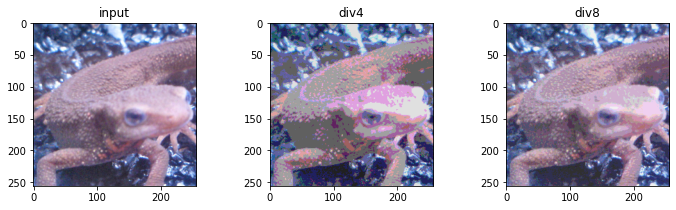

[ 32  96 160 224]
[ 16  48  80 112 144 176 208 240]


In [7]:
def color_subtraction(rgb_img, div=4):
    th = 256 // div
    return np.clip(rgb_img // th * th + th // 2, 0, 255)

def q6():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    div4_img = color_subtraction(img_orig, div=4)
    div8_img = color_subtraction(img_orig, div=8)
    plt.figure(figsize=(12, 3))
    plt.subplot(1,3,1)
    plt.imshow(img_orig)
    plt.title("input")
    plt.subplot(1,3,2)
    plt.imshow(div4_img)
    plt.title("div4")
    plt.subplot(1,3,3)
    plt.imshow(div8_img)
    plt.title("div8")
    plt.show()
    print(np.unique(div4_img.reshape(-1, 1)))
    print(np.unique(div8_img.reshape(-1, 1)))
q6()

## Q.7 平均プーリング, average pooling
ここでは画像をグリッド分割(ある固定長の領域に分ける)し、かく領域内(セル)の平均値でその領域内の値を埋める。 このようにグリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる。 これらプーリング操作はCNN(Convolutional Neural Network) において重要な役割を持つ。

平均プーリングは次式で定義される。ここでいうRはプーリングを行う領域である。つまり、3x3の領域でプーリングを行う。|R|=3x3=9となる。

(256, 256, 3) 3 3 3 3
(262, 262, 3)


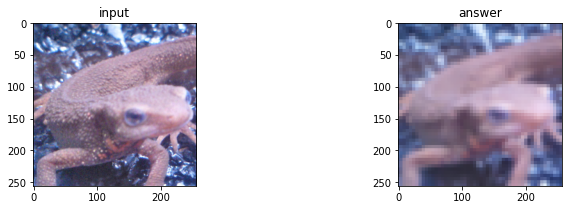

In [8]:
def pool_average(rgb_img, ksize_h, ksize_w, stride_h, stride_w):
    _img = rgb_img.copy().astype(np.float32)
    # padding
    h, w = _img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    print(_img.shape, pad_top, pad_bottom, pad_left, pad_right)
    # [(axis=0のpad), (axis=1のpad), (axis=2のpad)]
    # mode="edge"で端からpaddingする
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], "edge")
    pool_img = np.zeros_like(_img)
    print(pool_img.shape)
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    nh, nw = pool_img.shape[:2]
    for i in range(0, nh, stride_h):
        for j in range(0, nw, stride_w):
            for c in range(ch):
                pool_img[i:i+ksize_h, j:j+ksize_w, c] = _img[i:i+ksize_h, j:j+ksize_w, c].mean()
    pool_img = pool_img[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(pool_img, 0, 255).astype(np.uint8)

def q7():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_pool = pool_average(img_orig, ksize_h=10, ksize_w=10, stride_h=5, stride_w=5)
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 2, 2)
    plt.title('answer')
    plt.imshow(img_pool)
    plt.show()
q7()

(256, 256, 3) 0 0 0 0
(256, 256, 3)


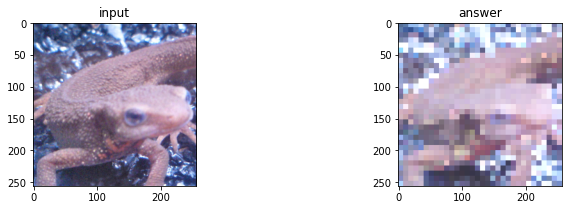

In [9]:
def pool_max(rgb_img, ksize_h, ksize_w, stride_h, stride_w):
    _img = rgb_img.copy().astype(np.float32)
    # padding
    h, w = _img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    print(_img.shape, pad_top, pad_bottom, pad_left, pad_right)
    # [(axis=0のpad), (axis=1のpad), (axis=2のpad)]
    # mode="edge"で端からpaddingする
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], "edge")
    pool_img = np.zeros_like(_img)
    print(pool_img.shape)
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    nh, nw = pool_img.shape[:2]
    for i in range(0, nh, stride_h):
        for j in range(0, nw, stride_w):
            for c in range(ch):
                pool_img[i:i+ksize_h, j:j+ksize_w, c] = _img[i:i+ksize_h, j:j+ksize_w, c].max()
    pool_img = pool_img[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(pool_img, 0, 255).astype(np.uint8)

def q7():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_pool = pool_max(img_orig, ksize_h=8, ksize_w=8, stride_h=8, stride_w=8)
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('input')
    plt.imshow(img_orig)
    plt.subplot(1, 2, 2)
    plt.title('answer')
    plt.imshow(img_pool)
    plt.show()
q7()

## Q.9 ガウシアンフィルタ, gaussian filter
イモリの画像がノイズだらけになってしまった！　これをどうにかしたいので、ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_256x256_noise.pngのノイズを除去せよ。

ガウシアンフィルタとは画像の平滑化（滑らかにする）を行うフィルタの一種であり、ノイズ除去にも使われる。

ノイズ除去には他にも、メディアンフィルタ(Q.10)、平滑化フィルタ(Q.11)、LoGフィルタ(Q.19)などがある。

ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。 このような重みはカーネルやフィルタと呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを0パディングと呼ぶ。 かつ、重みは正規化する。(sum g = 1)

重みはガウス分布から次式になる。

$k(x, y) = \frac{1}{2 \pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma ^ 2}}$

例えば$\sigma = 1.3$、カーネルサイズ3の場合は、次式となる。

$ k = \frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \ 2 & 4 & 2 \ 1 & 2 & 1 \end{bmatrix} $

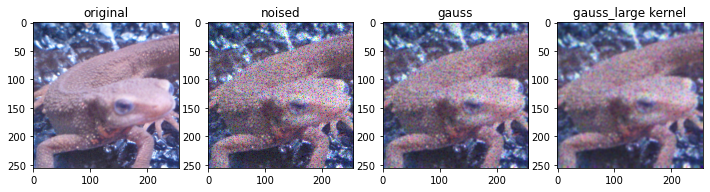

In [10]:
def GaussianBlur(img, ksize=(3,3), sigma=1.3):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    # [(axis=0のpad), (axis=1のpad), (axis=2のpad)]
    # mode="edge"で端からpaddingする
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], mode="edge")
    out = np.zeros_like(_img)
    nh, nw = out.shape[:2]
    # kernelの作成
    k = np.zeros(ksize)
    for i in range(ksize_h):
        for j in range(ksize_w):
            k[i, j] = 1 / (2 * np.pi * sigma**2) * np.exp(-((i - ksize_h//2)**2 + (j - ksize_w//2)**2) / (2 * sigma**2))
    k /= k.sum()
    # フィルタリング
    for i in range(nh - ksize_h):
        for j in range(nw - ksize_w):
            for c in range(ch):
                out[i, j, c] = np.sum(_img[i:i+ksize_h, j:j+ksize_w, c] * k)
    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

def q9():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_noise_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
    img_gauss = GaussianBlur(img_noise_orig)
    img_gauss_large_filter = GaussianBlur(img_noise_orig, ksize=(7, 7))
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.title('original')
    plt.imshow(img_orig)
    plt.subplot(1, 4, 2)
    plt.title('noised')
    plt.imshow(img_noise_orig)
    plt.subplot(1, 4, 3)
    plt.title('gauss')
    plt.imshow(img_gauss)
    plt.subplot(1, 4, 4)
    plt.title('gauss_large kernel')
    plt.imshow(img_gauss_large_filter)
    plt.show()

q9()

## Q.10 メディアンフィルタ, median filter
次にメディアンフィルタ(3x3)を実装し、imori_256x256_noise.jpgのノイズを除去せよ。

メディアンフィルタとは画像の平滑化を行うフィルタの一種である。

これは注目画素の3x3の領域内の、メディアン値(中央値)を出力するフィルタである。

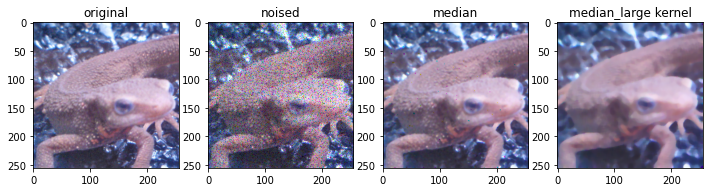

In [11]:
def MedianBlur(img, ksize=(3,3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    # [(axis=0のpad), (axis=1のpad), (axis=2のpad)]
    # mode="edge"で端からpaddingする
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], mode="edge")
    out = np.zeros_like(_img)
    nh, nw = out.shape[:2]

    # フィルタリング
    for i in range(nh - ksize_h):
        for j in range(nw - ksize_w):
            for c in range(ch):
                out[i, j, c] = np.median(_img[i:i+ksize_h, j:j+ksize_w, c])
    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

def q10():
    img_orig = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png")
    img_noise_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
    img_median = MedianBlur(img_noise_orig)
    img_median_large_filter = MedianBlur(img_noise_orig, ksize=(7, 7))
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.title('original')
    plt.imshow(img_orig)
    plt.subplot(1, 4, 2)
    plt.title('noised')
    plt.imshow(img_noise_orig)
    plt.subplot(1, 4, 3)
    plt.title('median')
    plt.imshow(img_median)
    plt.subplot(1, 4, 4)
    plt.title('median_large kernel')
    plt.imshow(img_median_large_filter)
    plt.show()

q10()